In [2]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
import numpy as np
%matplotlib inline

In [3]:
import os
os.system("cp ../images/image03.png ../images/image04.png ../images/image12.png ../images/image13.png .")

0

In [4]:
img1 = cv2.imread("image03.png")
img2 = cv2.imread("image04.png")
img3 = cv2.imread("image12.png")
img4 = cv2.imread("image13.png")

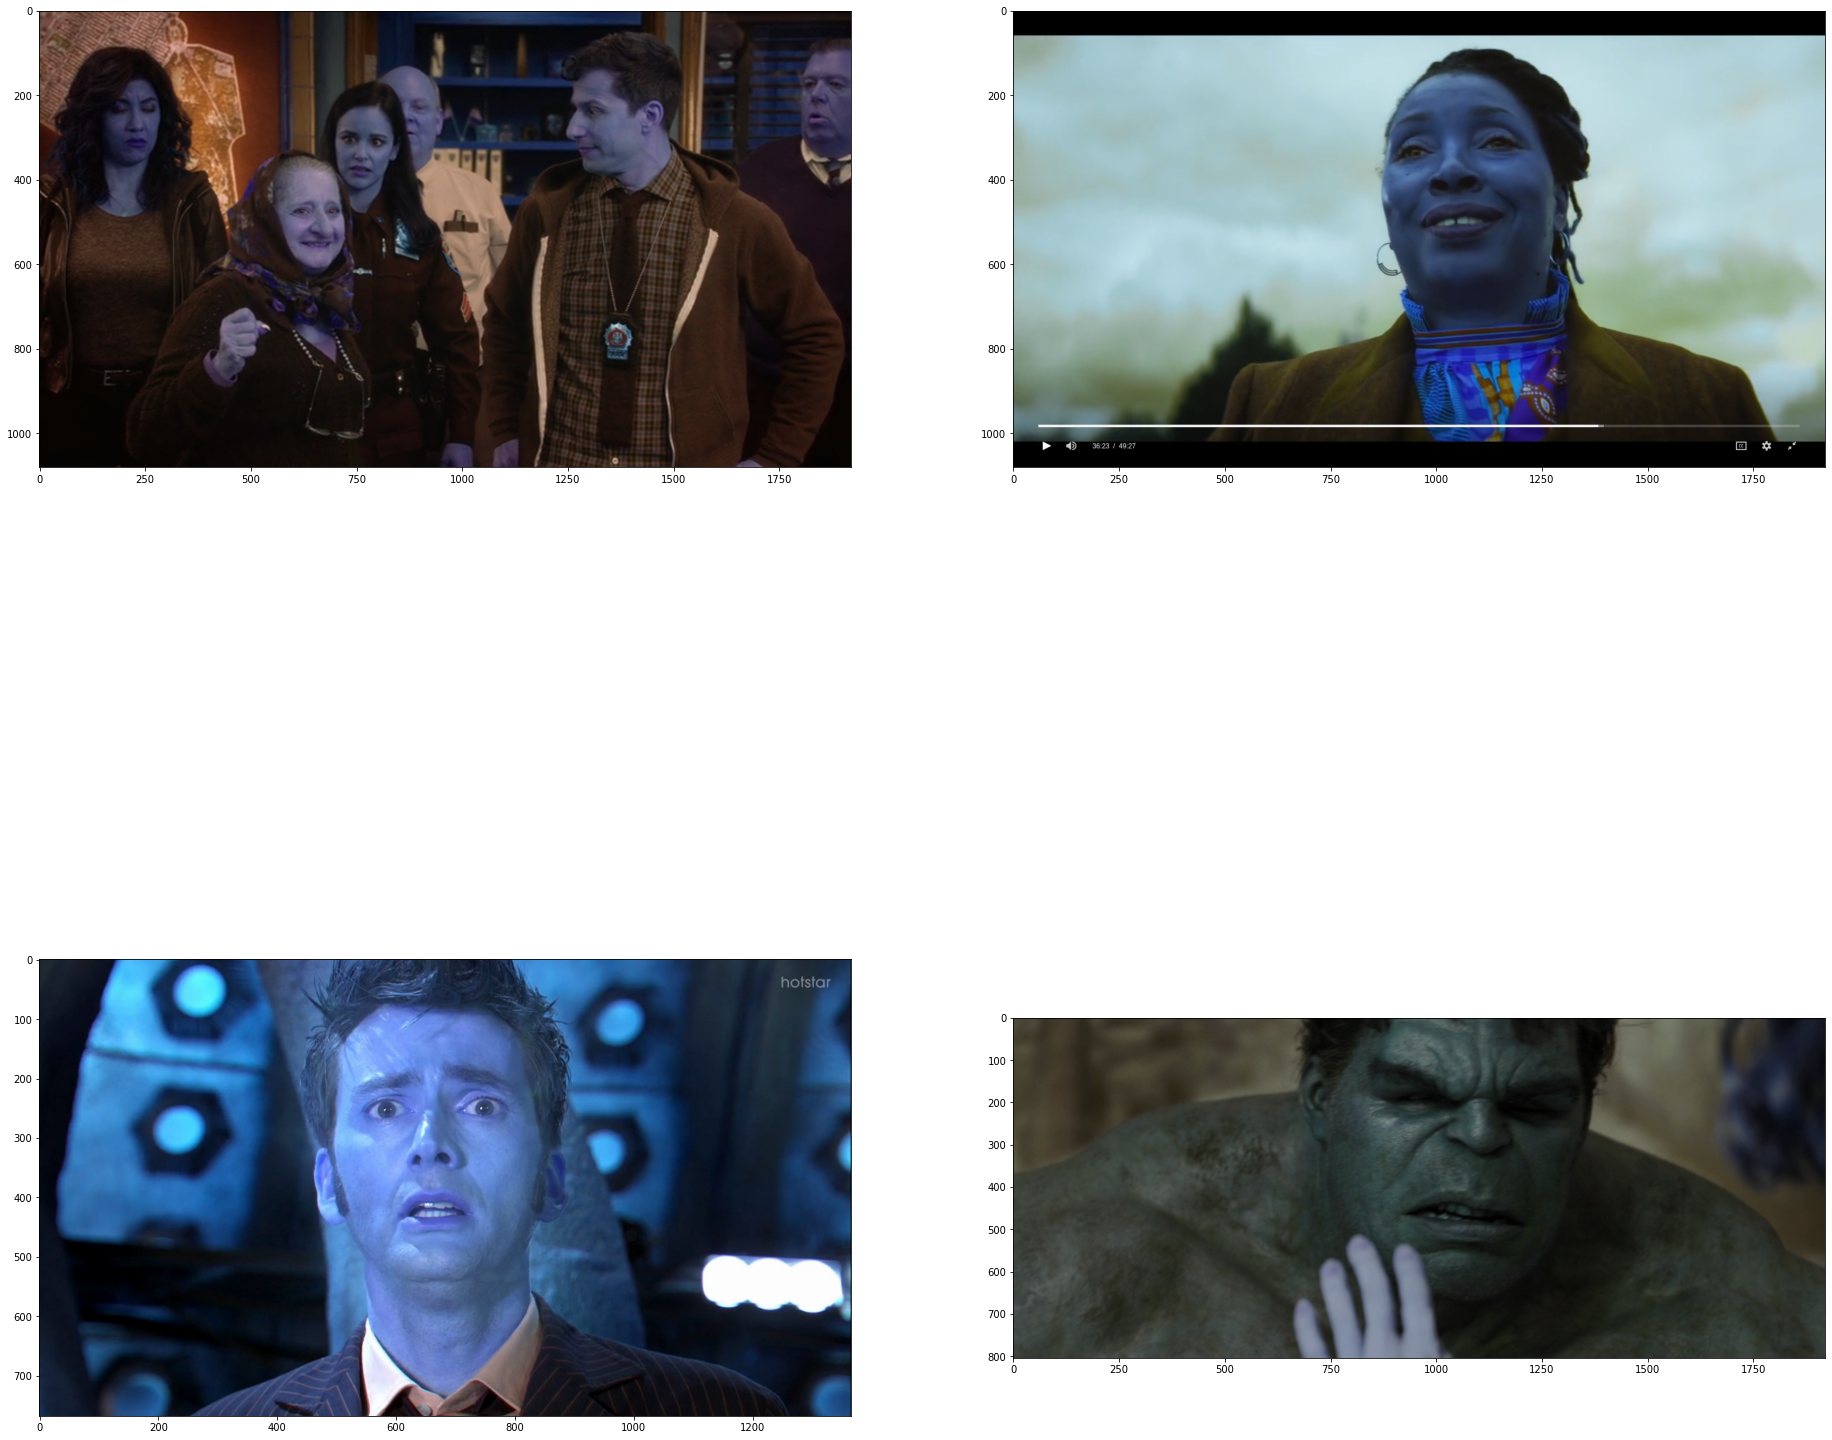

In [5]:
fig = plt.figure(figsize=(32,32))

ax = fig.add_subplot(2,2,1)
imgplot = plt.imshow(img1)
ax = fig.add_subplot(2,2,2)
imgplot = plt.imshow(img2)
ax = fig.add_subplot(2,2,3)
imgplot = plt.imshow(img3)
ax = fig.add_subplot(2,2,4)
imgplot = plt.imshow(img4)

### Ok, why does David Tennant in the 3rd pic look blue?

Or for that matter, why do the humans in all the pics look blue?

Reason: In OpenCV, the images are stored in the BGR format, where it stores the Blue Channel first, then the Green Channel, and then the Red Channel. If you end up feeding it verbatim to the output function of Matplotlib, it reads the image input as RGB, where it reads the *Blue* channel as *Red*, *Green* channel as *Green* and *Red* channel as *Blue*. Hence, peach becomes blue, and David Tennant therefore looks blue.

### Ok, so that's a mismatch. How do we fix that?

To fix that, we need to reorder the channels. Let's use cv2.cvtColor to do that.

In [6]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

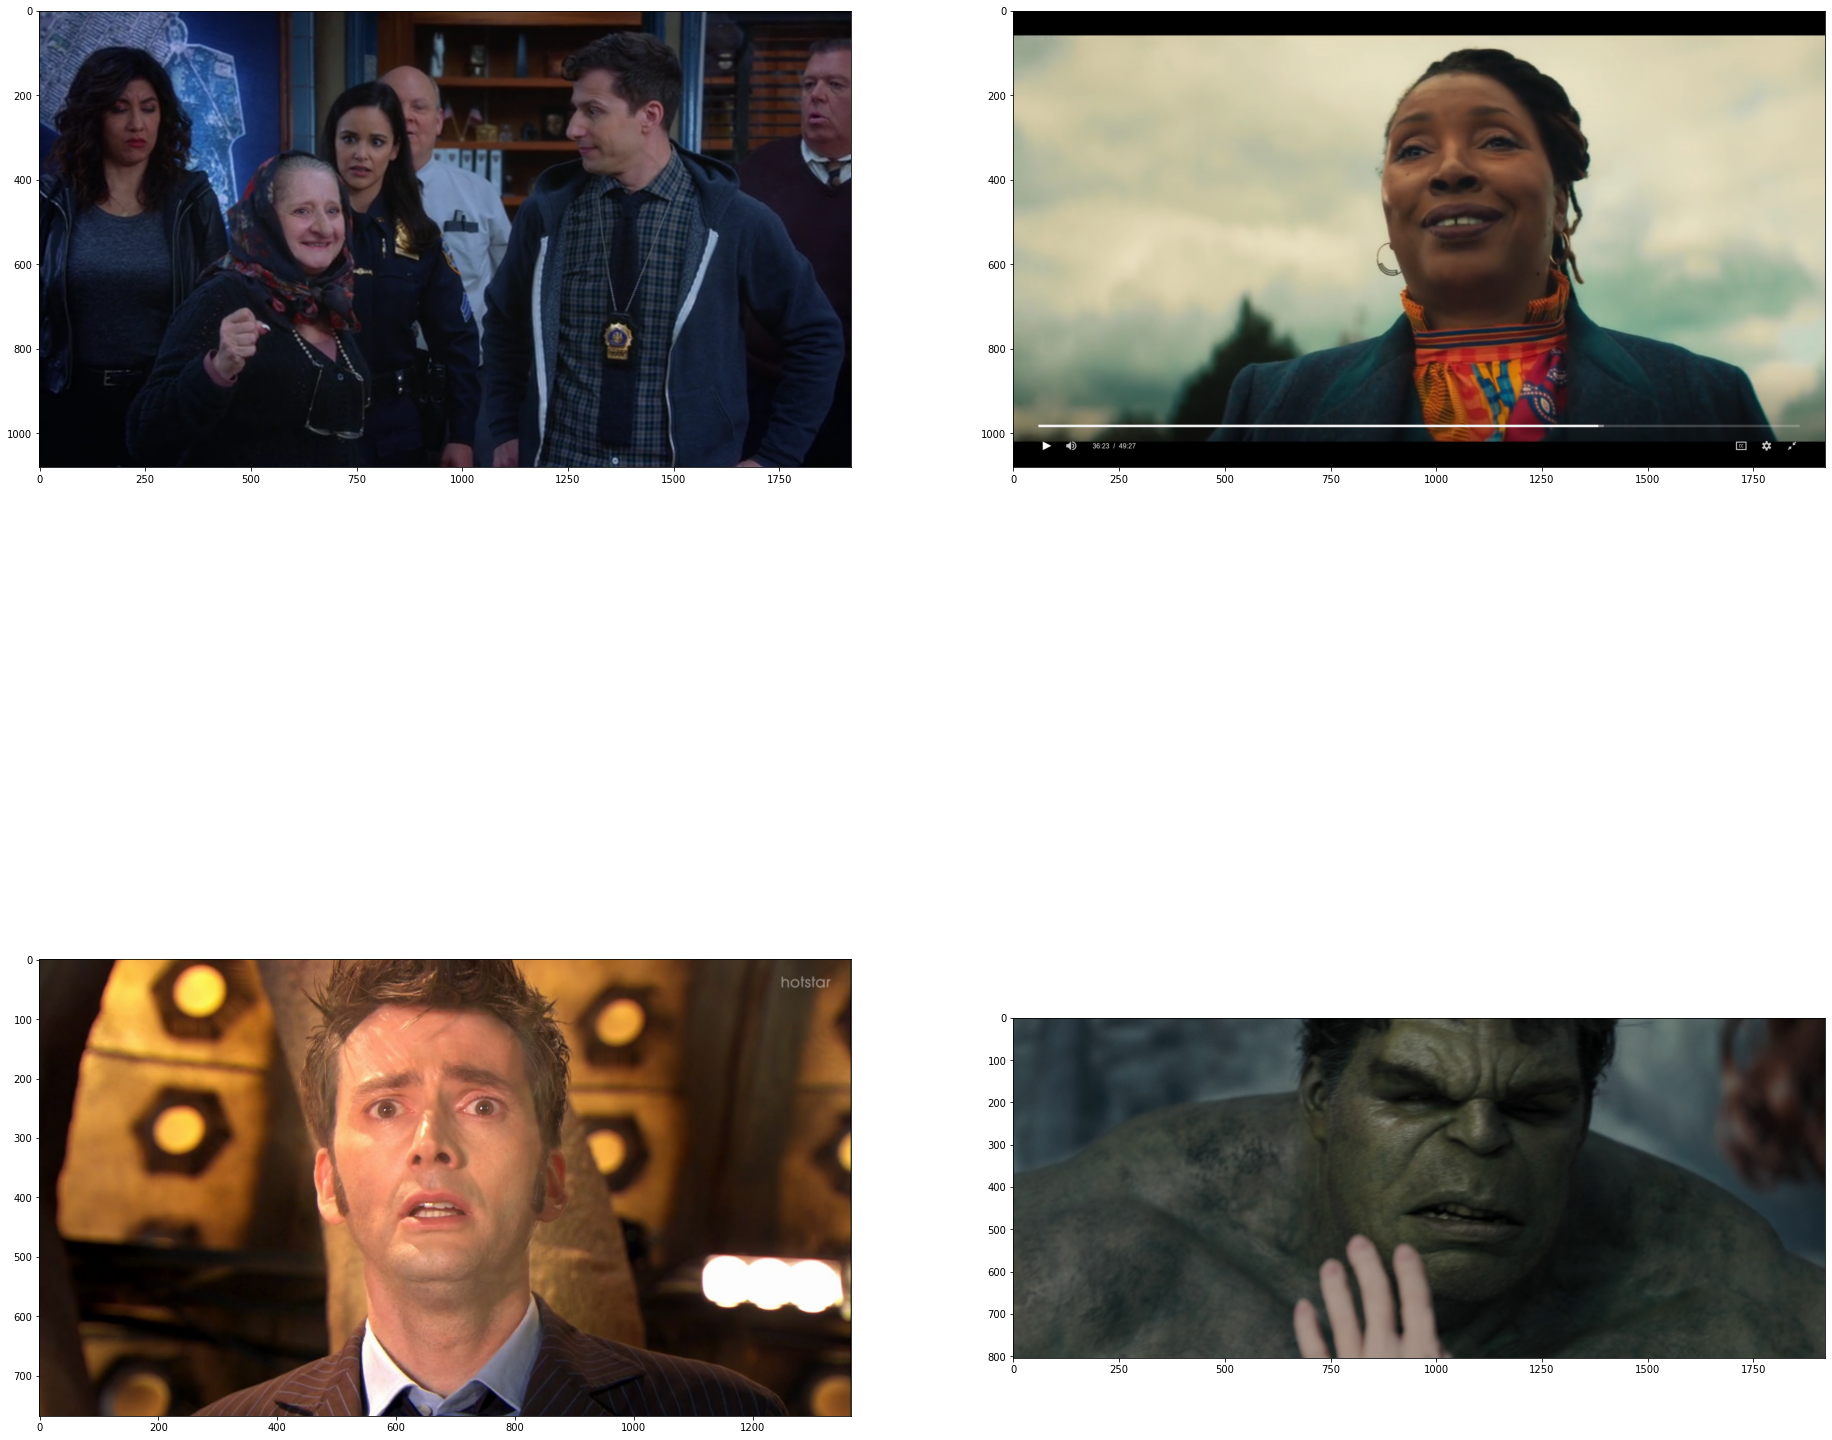

In [7]:
fig = plt.figure(figsize=(32,32))

ax = fig.add_subplot(2,2,1)
imgplot = plt.imshow(img1)
ax = fig.add_subplot(2,2,2)
imgplot = plt.imshow(img2)
ax = fig.add_subplot(2,2,3)
imgplot = plt.imshow(img3)
ax = fig.add_subplot(2,2,4)
imgplot = plt.imshow(img4)

### Oh okay! So David Tennant is peachy.

Yes, he is.

And the map of New York with neon lights in the precinct, that's blue in colour. Not brown, as we previously saw.

### What's next??

We have to look at the shape of the image to look at the number of rows, columns and channels. This can be done using the "shape" method for Numpy arrays.

Yes, they are Numpy arrays. And I can confirm that from the next cell.

In [10]:
dims = img3.shape
print("Rows: ",dims[0])
print("Columns: ",dims[1])
print("Channels: ",dims[2])
print(type(img3))
print(img3.dtype)

Rows:  768
Columns:  1366
Channels:  3
<class 'numpy.ndarray'>
uint8


In [11]:
max_img = np.max(img3)
min_img = np.min(img3)
print(max_img)
print(min_img)

253
0


### Why is the maximum value 253 (or 255)?

Reason: Each of the values in each of the 2-d arrays is an unsigned 8-bit integer. The range of values, therefore, will be from $0$ to $2^{8} - 1$. When you try to find the maximum value, the search takes place in each of the 3 individual 2D Numpy arrays.